# Introduction To Data Science – Assignment 1

---

### Sections A – B – C – D

---

***Instructions***

Due Date: Sunday 18th September 2022 – 11:59PM

Name the file in the format Lyyxxxx and save it as .ipynb (e.g. L201234.ipynb)

Submission will be taken on **GitHub and Google Classroom (submit the .ipynb file)** - Instructions to upload onto GitHub are provided in the link https://docs.google.com/document/d/1BR1ULOGeGWJVU6Rr6Qty1FR-quVRZyRvQGII6nEs-wo/edit?usp=sharing

After uploading and submitting the .ipynb file onto Google Classroom, also private comment the link to the GitHub repository.

All source files needed to complete this assignment can be found on the following Google Drive link https://drive.google.com/drive/folders/1VrkaVcExGWqilSeh50WZe4gUBjmUiJ9b?usp=sharing

TA Emails

Section A, C - Muhammad Maarij l192347@lhr.nu.edu.pk

Section B, D - Hira Ijaz l192377@lhr.nu.edu.pk

Happy Coding 😊

---

---
## Question 1
---

Define a procedure called "check_input" that takes an input as a square list of lists (2D Matrix of N x N) and returns a boolen "true" if the input is valid or "false" otherwise, according to the following criteria.

1. Each coloumn must contain numbers from between 1 and N, with no duplicates.
2. Each row must contain numbers from between 1 and N, with no duplicates.

In [ ]:
# define procedure here
def check_input(ar):
  rows=len(ar)
  cols=len(ar[0])
  for i in range(rows-1):
    x=ar[i][0]  # this indictes the value of the index we will match with the rest of the row/col
    for j in range(cols-1):
      if (ar[i+1][j]==x) or (ar[j+1][i]==x):
          return False #even if one value is equal no need to check further
  return True

In [ ]:
# run this block to test code after defining the procedure

test1 = [[1, 2, 3],
        [2, 3, 1],
        [3, 1, 2]]

test2 = [[1, 2, 3, 4],
        [2, 3, 1, 3],
        [3, 1, 2, 3],
        [4, 4, 4, 4]]

test3 = [['a', 'b', 'c'],
        ['b', 'c', 'a'],
        ['c', 'a', 'b']]

print(check_input(test1)) # must return true
print(check_input(test2)) # must return false
print(check_input(test3)) # must return false

True
False
True


---
## Question 2
---

**Part A** - Import the file "StudentMarkSheet.csv" as a Pandas DataFrame and print the information for the dataframe

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as num
sm= pd.read_csv("/content/StudentMarkSheet.csv")
sm

,Student name,Exam name,Exam date,Marks
0,James Walker,Biology,05/06/2016,31.0
1,Velma Clemons,Biology,05/06/2016,43.0
2,Kibo Underwood,Biology,05/06/2016,81.0
3,Louis Mcgee,Biology,05/06/2016,11.0
4,Phyllis Paul,Biology,05/06/2016,18.0
...,...,...,...,...
195,Yen Bowers,Sociology,21/06/2016,52.0
196,Ryan Pena,Sociology,21/06/2016,16.0
197,Portia Hamilton,Sociology,21/06/2016,34.0
198,Sydnee Chambers,Sociology,21/06/2016,76.0


**Part B** - Remove any rows that do not contain all the data. Also print the following information.

1. Number of rows before
2. Number of rows containing null data
3. Number of rows after

In [ ]:
print(sm.count()) #to get the info of the data
print("no of rows before removing null values: ", len(sm.index))
sm.dropna(inplace=True) # to remove null value
print("no of rows before removing null values: ", len(sm.index))

Student name    200
Exam name       199
Exam date       200
Marks           197
dtype: int64
no of rows before removing null values:  200
no of rows before removing null values:  196


**Part C** - Print all the marks along with the subject for the student named "James Walker"

In [ ]:
sm[sm['Student name']=='James Walker']

,Student name,Exam name,Exam date,Marks
0,James Walker,Biology,05/06/2016,31.0
42,James Walker,Chemistry,15/06/2016,61.0
71,James Walker,Mathematics,29/07/2016,23.0
150,James Walker,Physics,10/06/2016,100.0
180,James Walker,Sociology,21/06/2016,73.0


---
## Question 3
---

**Part A** - From the DataFrame created in Question 2, calculate the average marks for each subject

In [ ]:
exam=sm.groupby(['Exam name'],as_index=False)['Marks'].mean() # using as_index to give the name to marks col
print(exam)

     Exam name      Marks
0      Biology  47.894737
1    Chemistry  50.576923
2  Mathematics  48.972222
3   Philosophy  47.270270
4      Physics  51.761905
5    Sociology  56.026316


**Part B** - Using the averages you just calculated, plot a Bar Graph showing the average marks of each subject

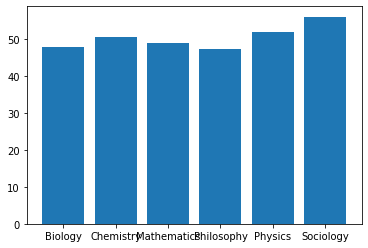

In [ ]:
x=exam['Exam name'] #storing data in x
y=exam['Marks'] #storing data in y

plt.bar(x,y)
plt.show()

---
## Question 4
---

**Part A** - Import the file "CatData.csv" and preprocess it to remove any null values

In [ ]:
#importing models from sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as num

df= pd.read_csv("/content/CatData.csv")
df.dropna(inplace=True) #removing null values
df

,Tail Length (cm),Mass (kg)
0,18.1,3.750
1,18.6,3.800
2,19.5,3.250
3,19.3,3.450
4,19.0,3.650
...,...,...
337,20.7,4.000
338,20.2,3.400
339,19.3,3.775
340,21.0,4.100


**Part B** - Identify the independant and dependant variables (comment answer below)

In [ ]:
# dependant variable: tail lenght
# independant variable: mass

**Part C** - Create a linear regression model using sklearn and fit it to the data you just imported


In [ ]:
n=int(len(df)*0.8)
#for training
train=df[:n]
#for testing
test=df[n:]

print("data:  ",len(df))
print("test:  ",len(test))
print("train: ", len(train)) 

data:   342
test:   69
train:  273


In [ ]:
#storing data in array format in x and y
x = df['Mass (kg)'].values.reshape(-1,1)
y= df['Tail Length (cm)'].values.reshape(-1,1)

#using this func to split data into train and test
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, train_size=0.8) 

regr= LinearRegression()
 
regr.fit(x_train, y_train) #fitting the training model for regressiom
print(regr.score(x_test, y_test))

y_p=regr.predict(x_test)#predicting y^ for all the test data

0.7739403268036806


**Part D** - Print the values for slope and y-intercept

In [ ]:
slope= regr.coef_
inter= regr.intercept_
print("Slope: ",slope)
print("Intercept: ", inter)


Slope:  [[1.55952798]]
Intercept:  [13.55679826]


**Part E** - Plot a scatter graph of the original data and a regression line on the same figure (example with dummy data shown below)

![](https://drive.google.com/uc?export=view&id=1o_NAsNjfx7zAh9m-UjvWB3rta6uraKdY)

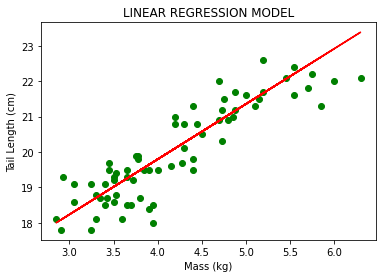

In [ ]:
plt.scatter(x_test,y_test, color = "green")#ploting vlaues of the test data of x and y
plt.plot(x_test, y_p, color= "red")# plotting y^ againts x test
plt.title("LINEAR REGRESSION MODEL")
plt.xlabel("Mass (kg)")
plt.ylabel("Tail Length (cm)")
plt.show()